<a href="https://colab.research.google.com/github/Lfagundesnetto/MVP_MachineLearning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PUC-RIO - SPRINT: MACHINE LEARNING & ANALYTICS

## **MVP: Análise do Desempenho Estudantil**

### Leticia Fagundes Netto

# **Objetivo**


O objetivo deste estudo é analisar os fatores que influenciam o desempenho estudantil, considerando variáveis como características demográficas, frequência escolar e atividades extracurriculares. Além disso, o trabalho busca prever se o(a) aluno(a) será aprovado(a) ou reprovado(a), bem como estimar sua nota final ou situação acadêmica, utilizando técnicas de machine learning para identificar padrões e insights relevantes.

# **Descrição do Dataset**

Link para o Dataset Original: [Student Performance](https://archive.ics.uci.edu/dataset/320/student+performance)

**O Dataset**: Dois conjuntos de dados sobre o desempenho escolar de alunos (de escolas secundárias) em Matemática e Língua Portuguesa. Cada registro contem informações demográficas, educacionais e comportamentais por aluno, assim como suas notas.

### ***Atributos do Dataset***

#### *Sobre os Alunos:*

* **school:** Escola - (GP: Gabriel Pereira, MS: Mousinho da Silveira)
* **sex:** Sexo (F: Feminino, M: Masculino)
* **age:** Idade (15 a 22 anos)
* **address:** Tipo de área residencial (U: Urbano, R: Rural)
* **famsize:** Tamanho da família (LE3: <= 3, GT3: > 3)
* **Pstatus:** Estado civil dos pais (T: Juntos, A: Separados)

#### *Sobre os Pais/Responsáveis:*

* **Medu:** Grau de instrução da mãe (0: Nenhum, 1: Ensino primário, 2: Ensino fundamental, 3: Ensino médio, 4: Ensino superior)
* **Fedu:** Grau de instrução do pai
* **Mjob:** Profissão da mãe (teacher, health, services, at_home, other).
* **Fjob:** Profissão do pai
* **reason:** Motivo para escolha da escola (home, reputation, course, other)
* **guardian:** Responsável pelo aluno (mother, father, other)

#### *Sobre os estudos e vida escolar:*

* **traveltime:** Tempo de deslocamento casa-escola (1: <15 min, 2: 15-30 min, 3: 30-60 min, 4: >1 hora)
* **studytime:** Tempo de estudo semanal (1: <2 horas, 2: 2-5 horas, 3: 5-10 horas, 4: >10 horas)
* **failures:** Número de reprovações anteriores (0 a 3; 4 se >3)
* **schoolsup:** Suporte educacional extra (yes, no)
* **famsup:** Suporte educacional da família (yes, no)
* **paid:** Aulas extras pagas na disciplina (yes, no)
* **activities:** Atividades extracurriculares (yes, no)
* **nursery:** Frequentou pré-escola (yes, no)
* **higher:** Interesse em cursar ensino superior (yes, no)

#### *Estilo de vida:*

* **internet:** Acesso à internet em casa (yes, no)
* **romantic:** Está em um relacionamento amoroso (yes, no)
* **famrel:** Qualidade das relações familiares (1: Muito ruim, 5: Excelente)
* **freetime:** Tempo livre após a escola (1: Muito baixo, 5: Muito alto)
* **goout:** Frequência em sair com amigos (1: Muito baixa, 5: Muito alta)
* **Dalc:** Consumo de álcool em dias de semana (1: Muito baixo, 5: Muito alto)
* **Walc:** Consumo de álcool em fins de semana (1: Muito baixo, 5: Muito alto)
* **health:** Estado de saúde atual (1: Muito ruim, 5: Muito bom)

#### *Desempenho Acadêmico:*

* **absences:** Número de faltas na escola (0 a 93)
* **G1:** Nota do 1º período (0 a 20)
* **G2:** Nota do 2º período (0 a 20)
* **G3:** Nota final (0 a 20)

# **Processamento e Tratamento dos Dados**

## Importação dos Dados

In [1]:
import pandas as pd

# Caminho - Datasets - no GitHubg
math_url = "https://raw.githubusercontent.com/Lfagundesnetto/MVP_MachineLearning/main/student-mat.csv"
portuguese_url = "https://raw.githubusercontent.com/Lfagundesnetto/MVP_MachineLearning/main/student-por.csv"

# Ler arquivos
math_df = pd.read_csv(math_url, sep=';')
portuguese_df = pd.read_csv(portuguese_url, sep=';')

### *Mesclando os dois datasets em um:*

In [2]:
# Valores em Comum
common_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob",
    "reason", "nursery", "internet"
]

# Fazer a junção usando o método merge
data = pd.merge(math_df, portuguese_df, on=common_columns, suffixes=('_math', '_port'))


In [3]:
print(len(data)) #num de alunos

382


## Tratamento de Dados

In [4]:
import pandas as pd

In [5]:
print(data.head()) #head do dataset

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel_port freetime_port  goout_port  Dalc_port  Walc_port health_port  \
0           4             3           4          1          1           3   
1           5             3           3          1          1           3   
2           4             3           2          2          3           3   
3           3             2           2          1          1           5   
4           4             3           2          1          2           5   

  absences_port G1_port G2_port G3_port  
0       

In [6]:
print(data.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian_math', 'traveltime_math', 'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math', 'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet', 'romantic_math', 'famrel_math', 'freetime_math', 'goout_math', 'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math', 'G2_math', 'G3_math', 'guardian_port', 'traveltime_port', 'studytime_port', 'failures_port', 'schoolsup_port', 'famsup_port', 'paid_port', 'activities_port', 'higher_port', 'romantic_port', 'famrel_port', 'freetime_port', 'goout_port', 'Dalc_port', 'Walc_port', 'health_port', 'absences_port', 'G1_port', 'G2_port', 'G3_port']


### Média de Português e Classificação

In [63]:
def classify_performance(data):
    # Calcular a média
    data['media_port'] = (data['G1_port'] + data['G2_port'] + data['G3_port']) / 3   # media de portugues

    # Condicionais
    classifications = []
    for media in data['media_port']:
        if media >= 18:
            classifications.append('Excelente')
        elif media >= 16:
            classifications.append('Muito Bom')
        elif media >= 14:
            classifications.append('Bom')
        elif media >= 12:
            classifications.append('Satisfatório')
        elif media >= 10:
            classifications.append('Mediano')
        else:
            classifications.append('Reprovado')

    data['class_port'] = classifications
    return data

In [64]:
# Aplicando ao dataset
data = classify_performance(data)

# Exibindo
print(data[['media_port', 'class_port']].head())

   media_port    class_port
0    7.333333     Reprovado
1   10.333333       Mediano
2   12.333333  Satisfatório
3   14.000000           Bom
4   12.333333  Satisfatório


### Média de Matemática e Classificação

In [9]:
def classify_performance_math(data):
    # Calcular a média
    data['media_math'] = (data['G1_math'] + data['G2_math'] + data['G3_math']) / 6  # media de matematica

    # Condicionais
    classifications_math = []
    for mediam in data['media_math']:
        if mediam >= 18:
            classifications_math.append('Excelente')
        elif mediam >= 16:
            classifications_math.append('Muito Bom')
        elif mediam >= 14:
            classifications_math.append('Bom')
        elif mediam >= 12:
            classifications_math.append('Satisfatório')
        elif mediam >= 10:
            classifications_math.append('Mediano')
        else:
            classifications_math.append('Reprovado')

    data['class_math'] = classifications_math
    return data

In [10]:
# Aplicando ao dataset
data = classify_performance_math(data)

# Exibindo
print(data[['media_math', 'class_math']].head())

   media_math class_math
0    2.833333  Reprovado
1    2.666667  Reprovado
2    4.166667  Reprovado
3    7.333333  Reprovado
4    4.333333  Reprovado


### Média Geral e Classificação

In [11]:
def classify_performance_geral(data):
    # Calcular a média
    data['media_geral'] = (data['G1_math'] + data['G2_math'] + data['G3_math'] + data['G1_port'] + data['G2_port'] + data['G3_port']) / 6  # media geral

    # Condicionais
    classifications_geral = []
    for mediam in data['media_geral']:
        if mediam >= 18:
            classifications_geral.append('Excelente')
        elif mediam >= 16:
            classifications_geral.append('Muito Bom')
        elif mediam >= 14:
            classifications_geral.append('Bom')
        elif mediam >= 12:
            classifications_geral.append('Satisfatório')
        elif mediam >= 10:
            classifications_geral.append('Mediano')
        else:
            classifications_geral.append('Reprovado')

    data['class_geral'] = classifications_geral
    return data

In [12]:
# Aplicando ao dataset
data = classify_performance_geral(data)

# Exibindo
print(data[['media_geral', 'class_geral']].head())

   media_geral class_geral
0     6.500000   Reprovado
1     7.833333   Reprovado
2    10.333333     Mediano
3    14.333333         Bom
4    10.500000     Mediano


# **Fatores que Levam ao Sucesso Acadêmico:**

**Modelos de Machine Learning (Supervisionados) usados:**


* **Random Forest Classifier:** Usado para identificar os fatores que mais influenciam a aprovação.

* **Gradient Boosting Regressor:** Usado para analisar os fatores que influenciam as notas finais.

* **Análise de Importância de Features:** Usada para identificar quais variáveis são mais influentes no sucesso acadêmico.

### Preparação dos Dados

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder


In [14]:
data['aprovado_port'] = data['class_port'].apply(lambda x: 1 if x != 'Reprovado' else 0)

In [15]:
data['aprovado_math'] = data['class_math'].apply(lambda x: 1 if x != 'Reprovado' else 0)

In [16]:
data['aprovado_geral'] = data['class_geral'].apply(lambda x: 1 if x != 'Reprovado' else 0)

## **Performance Geral**

### Fatores que influenciam as notas finais

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features e o Alvo (notas finais)
Xg = data.drop(columns=['media_geral', 'class_geral','media_port', 'class_port', 'aprovado_port', 'media_math', 'class_math'], errors='ignore')
yg = data['media_geral']  # Alvo: media_geral

# Dividir os dados em treino e teste
Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size=0.3, random_state=42)

columns_to_excludeg = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'class_port', 'aprovado_port', 'class_math', 'aprovado_math', 'class_geral', 'aprovado_geral']
X_train_adj = Xg_train.drop(columns=columns_to_excludeg, errors='ignore')
X_test_adj = Xg_test.drop(columns=columns_to_excludeg, errors='ignore')

# Converter
Xg_train_encoded = pd.get_dummies(X_train_adj, drop_first=True)
Xg_test_encoded = pd.get_dummies(X_test_adj, drop_first=True)

# Garantir Compatibilidade
Xg_test_encoded = Xg_test_encoded.reindex(columns=Xg_train_encoded.columns, fill_value=0)


# Treinar o modelo Gradient Boosting Regressor
gbg_model = GradientBoostingRegressor(random_state=42)
gbg_model.fit(Xg_train_encoded, yg_train)

# Previsões
yg_pred = gbg_model.predict(Xg_test_encoded)

# Avaliar o modelo
print("MSE (Erro Quadrático Médio):", mean_squared_error(yg_test, yg_pred))
print("R² (Coeficiente de Determinação):", r2_score(yg_test, yg_pred))

# Importância das features
feature_importancesg = gbg_model.feature_importances_
featuresg = Xg_train_encoded.columns
importance_g = pd.DataFrame({'Feature': featuresg, 'Importance': feature_importancesg}).sort_values(by='Importance', ascending=False)

# Exibir fatores mais importantes
print("\nFatores que Impactam as Notas Finais em Geral (Gradient Boosting):")
print(importance_g)

MSE (Erro Quadrático Médio): 5.730153819224369
R² (Coeficiente de Determinação): 0.2272131237011601

Fatores que Impactam as Notas Finais em Geral (Gradient Boosting):
                 Feature  Importance
5          failures_math    0.234246
22         absences_port    0.077731
12         absences_math    0.074462
2                   Fedu    0.042947
11           health_math    0.040640
1                   Medu    0.032991
4         studytime_math    0.028446
41    schoolsup_math_yes    0.028088
14        studytime_port    0.027952
21           health_port    0.024852
35          Fjob_teacher    0.024211
3        traveltime_math    0.023836
38     reason_reputation    0.022299
13       traveltime_port    0.021646
7          freetime_math    0.020989
24                 sex_M    0.019980
0                    age    0.019169
51    schoolsup_port_yes    0.016822
18            goout_port    0.016733
25             address_U    0.016023
37          reason_other    0.015871
46       higher_ma

### Fatores que influenciam a Aprovação

In [59]:
# Features e alvo
Xag = data.drop(columns=['class_geral', 'aprovado_geral'], errors='ignore')
yag = data['aprovado_geral']

# Dividir os dados em treino e teste
Xag_train, Xag_test, yag_train, yag_test = train_test_split(Xag, yag, test_size=0.3, random_state=42)

In [60]:
from dataclasses import dataclass
# Lista de colunas a serem removidas para regressão
columns_to_excludeag = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'media_port','media_math', 'media_geral','class_math', 'class_port', 'aprovado_port', 'aprovado_math']

# Criar subconjunto de features para regressão
Xag_train_encoded = Xag_train.drop(columns=columns_to_excludeag, errors='ignore')
Xag_test_encoded = Xag_test.drop(columns=columns_to_excludeag, errors='ignore')

# Converter colunas categóricas em variáveis numéricas
Xag_train_regression = pd.get_dummies(Xag_train_encoded, drop_first=True)
Xag_test_regression = pd.get_dummies(Xag_test_encoded, drop_first=True)

# Garantir que as colunas de treino e teste sejam compatíveis
Xag_test_regression = Xag_test_regression.reindex(columns=Xag_train_regression.columns, fill_value=0)

# Treinar o modelo
rf_modelag = RandomForestClassifier(random_state=42)
rf_modelag.fit(Xag_train_regression, yag_train)

# Importância das features
feature_importancesag = rf_modelm.feature_importances_
featuresag = Xag_train_regression.columns
importance_ag = pd.DataFrame({'Feature': featuresag, 'Importance': feature_importancesag}).sort_values(by='Importance', ascending=False)

# Fatores mais importantes
print("Fatores que Impactam a Aprovação Geral:")
print(importance_ag)

Fatores que Impactam a Aprovação Geral:
                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U    0.01732

### Fatores que influenciam a Reprovação

In [62]:
importance_ag = pd.DataFrame({
    'Feature': Xag_train_regression.columns,
    'Importance': rf_modelag.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibir fatores para reprovação
print("Fatores que Impactam a Reprovação:")
print(importance_ag)

Fatores que Impactam a Reprovação:
                 Feature  Importance
5          failures_math    0.082044
22         absences_port    0.063835
12         absences_math    0.050702
2                   Fedu    0.039528
0                    age    0.037348
7          freetime_math    0.034915
1                   Medu    0.028806
17         freetime_port    0.028775
3        traveltime_math    0.027435
11           health_math    0.026453
8             goout_math    0.025990
18            goout_port    0.024497
20             Walc_port    0.024105
16           famrel_port    0.022988
21           health_port    0.022853
4         studytime_math    0.020613
13       traveltime_port    0.020275
14        studytime_port    0.019786
6            famrel_math    0.019697
46       higher_math_yes    0.018929
10             Walc_math    0.018116
25             address_U    0.018045
26           famsize_LE3    0.017937
15         failures_port    0.016598
38     reason_reputation    0.015248
43 

## **Português**

### Fatores que influenciam as notas finais em **Português**

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features e o Alvo (notas finais)
Xn = data.drop(columns=['media_geral', 'class_geral','media_port', 'class_port', 'aprovado_port', 'media_math', 'class_math'], errors='ignore')
yn = data['media_port']  # Alvo: media_port

# Dividir os dados em treino e teste
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.3, random_state=42)

# Converter
Xn_train_encoded = pd.get_dummies(Xn_train, drop_first=True)
Xn_test_encoded = pd.get_dummies(Xn_test, drop_first=True)

# Garantir Compatibilidade
Xn_test_encoded = Xn_test_encoded.reindex(columns=Xn_train_encoded.columns, fill_value=0)

columns_to_excluden = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'class_port', 'aprovado_port', 'class_math', 'aprovado_math', 'class_geral', 'aprovado_geral']
X_train_adjn = Xn_train_encoded.drop(columns=columns_to_excluden, errors='ignore')
X_test_adjn = Xn_test_encoded.drop(columns=columns_to_excluden, errors='ignore')

# Treinar o modelo Gradient Boosting Regressor
gbn_model = GradientBoostingRegressor(random_state=42)
gbn_model.fit(X_train_adjn, yn_train)

# Previsões
yn_pred = gbn_model.predict(X_test_adjn)

# Avaliar o modelo
print("MSE (Erro Quadrático Médio):", mean_squared_error(yn_test, yn_pred))
print("R² (Coeficiente de Determinação):", r2_score(yn_test, yn_pred))

# Importância das features
feature_importancesn = gbn_model.feature_importances_
featuresn = X_train_adjn.columns
importance_n = pd.DataFrame({'Feature': featuresn, 'Importance': feature_importancesn}).sort_values(by='Importance', ascending=False)

# Exibir fatores mais importantes
print("\nFatores que Impactam as Notas Finais em Português (Gradient Boosting):")
print(importance_n)


MSE (Erro Quadrático Médio): 5.142370161074403
R² (Coeficiente de Determinação): 0.22675985524658615

Fatores que Impactam as Notas Finais em Português (Gradient Boosting):
                 Feature  Importance
5          failures_math    0.181609
14        studytime_port    0.054411
21           health_port    0.043521
2                   Fedu    0.038203
24                 sex_M    0.036910
1                   Medu    0.033827
0                    age    0.031494
55       higher_port_yes    0.030116
25             address_U    0.029596
41    schoolsup_math_yes    0.025576
51    schoolsup_port_yes    0.025059
37          reason_other    0.024770
19             Dalc_port    0.024370
22         absences_port    0.024148
3        traveltime_math    0.023928
29            Mjob_other    0.023537
13       traveltime_port    0.022993
15         failures_port    0.021994
20             Walc_port    0.021919
12         absences_math    0.017419
11           health_math    0.016049
7          fr

#### Gráfico

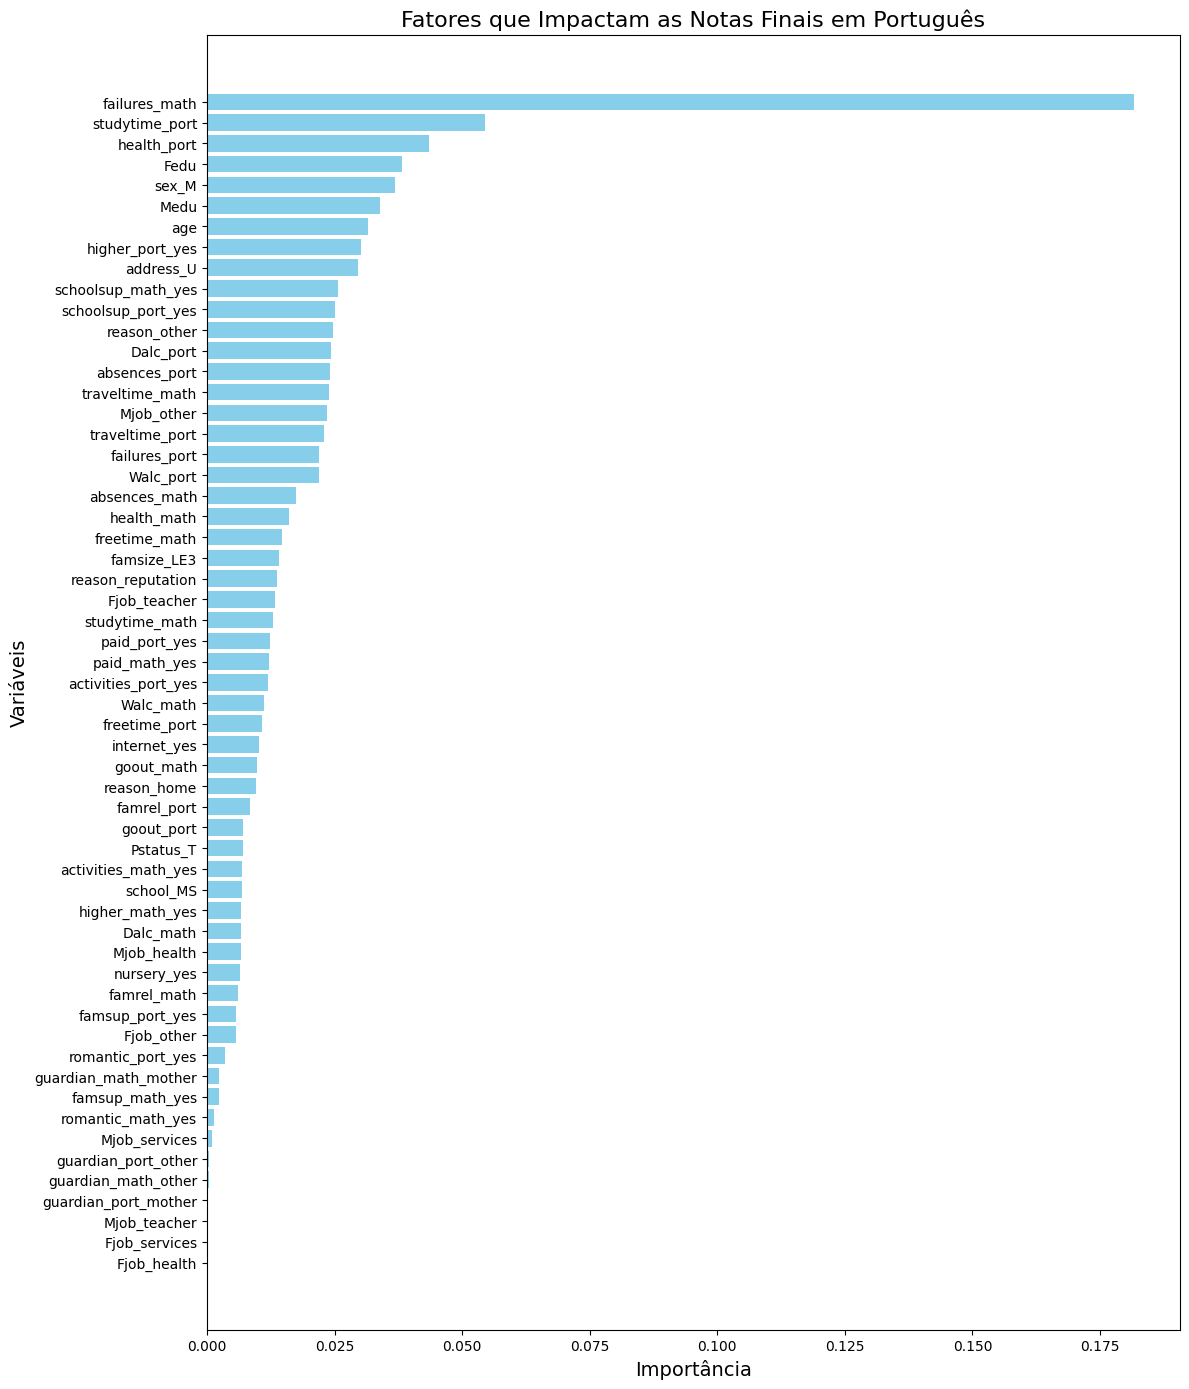

In [19]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 14))
plt.barh(importance_n['Feature'], importance_n['Importance'], color='skyblue')
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Variáveis', fontsize=14)
plt.title('Fatores que Impactam as Notas Finais em Português', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Fatores que influenciam a Aprovação em **Português**

In [20]:
# Features e alvo
X = data.drop(columns=['class_port', 'aprovado_port'], errors='ignore')
y = data['aprovado_port']

In [21]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from dataclasses import dataclass
# Lista de colunas a serem removidas para regressão
columns_to_exclude = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'media_port','media_math', 'media_geral','class_geral', 'class_math', 'aprovado_math', 'aprovado_geral']

# Criar subconjunto de features para regressão
X_train_encoded = X_train.drop(columns=columns_to_exclude, errors='ignore')
X_test_encoded = X_test.drop(columns=columns_to_exclude, errors='ignore')

# Converter colunas categóricas em variáveis numéricas
X_train_regression = pd.get_dummies(X_train_encoded, drop_first=True)
X_test_regression = pd.get_dummies(X_test_encoded, drop_first=True)

# Garantir que as colunas de treino e teste sejam compatíveis
X_test_regression = X_test_regression.reindex(columns=X_train_regression.columns, fill_value=0)

# Treinar o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_regression, y_train)

# Importância das features
feature_importances = rf_model.feature_importances_
features = X_train_regression.columns
importance_port_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Fatores mais importantes
print("Fatores que Impactam a Aprovação em Portugues:")
print(importance_port_df)

Fatores que Impactam a Aprovação em Portugues:
                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U    

#### Tabela Completa

In [45]:
print(importance_port_df.to_string())

                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U    0.017328
6            famrel_math    0.016886
1

#### Gráfico

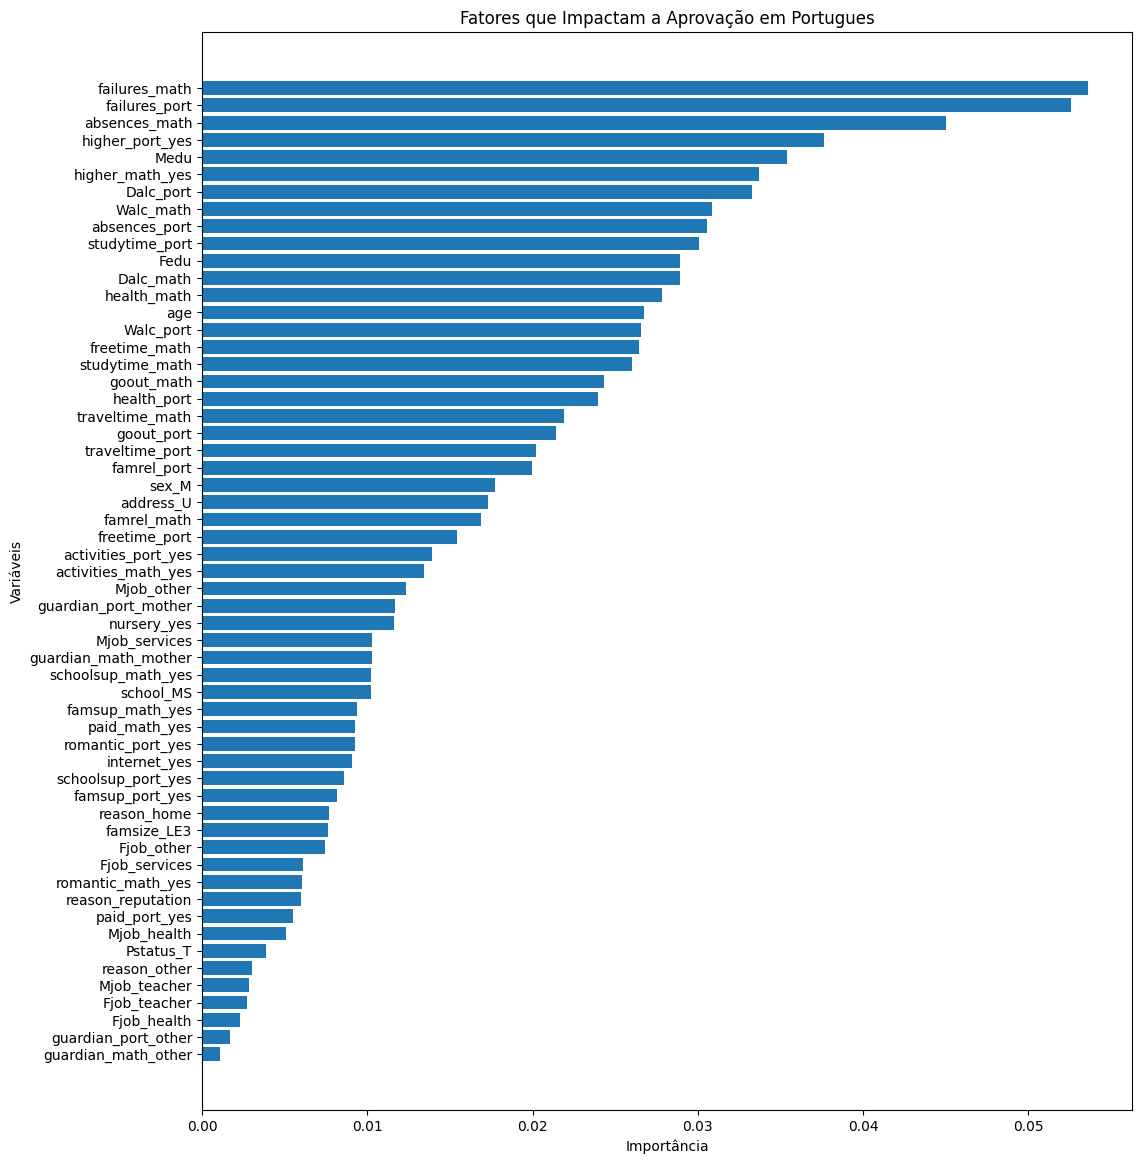

In [46]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,14))
plt.barh(importance_port_df['Feature'], importance_port_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Aprovação em Portugues')
plt.gca().invert_yaxis()

plt.show()

### Fatores que influenciam a Reprovação em **Português**

In [47]:
# Importância
importance_rp_df = pd.DataFrame({
    'Feature': X_train_regression.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibir fatores para reprovação
print("Fatores que Impactam a Reprovação:")
print(importance_rp_df)

Fatores que Impactam a Reprovação:
                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U    0.017328
6  

#### Tabela Completa

In [48]:
print("Fatores que Impactam a Reprovação em Português:")
print(importance_rp_df.to_string())

Fatores que Impactam a Reprovação em Português:
                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U   

#### Gráfico

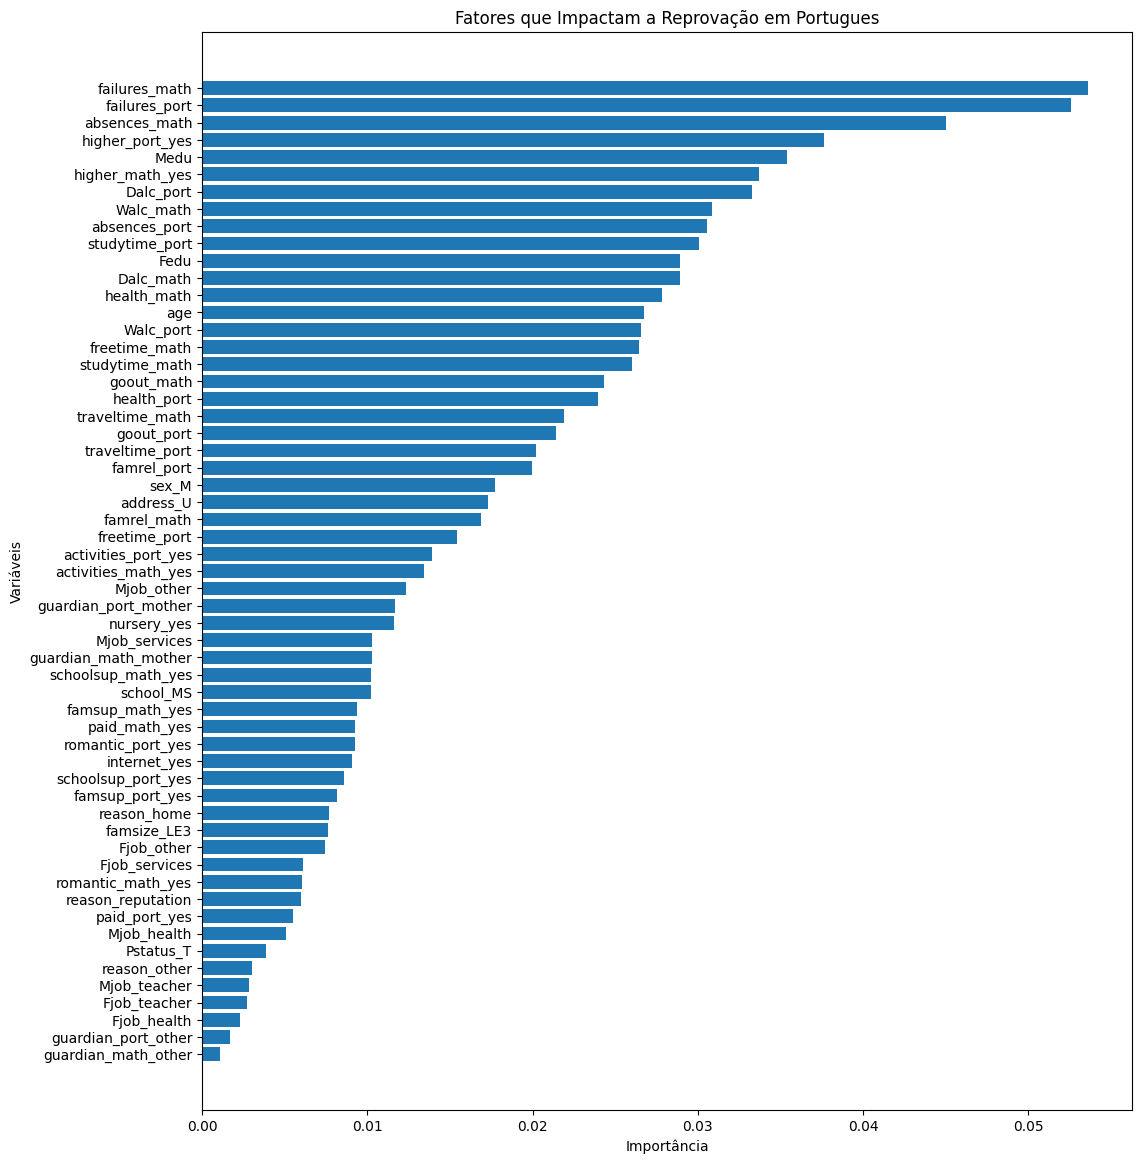

In [49]:
plt.figure(figsize=(12,14))
plt.barh(importance_rp_df['Feature'], importance_rp_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Reprovação em Portugues')
plt.gca().invert_yaxis()

plt.show()

### **Primeiras Análises**

## **Matemática**

### Fatores que influenciam as notas finais em **Matemática**

In [51]:
# Features e o Alvo (notas finais)
Xnm = data.drop(columns=['media_geral', 'class_geral','media_port', 'class_port', 'aprovado_port', 'media_math', 'class_math'], errors='ignore')
ynm = data['media_math']  # Alvo: media_math

# Dividir os dados em treino e teste
Xnm_train, Xnm_test, ynm_train, ynm_test = train_test_split(Xnm, ynm, test_size=0.3, random_state=42)

# Excluir Colunas
columns_to_excludenm = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'class_port', 'aprovado_port', 'class_math', 'aprovado_math', 'class_geral', 'aprovado_geral']
Xnm_train_encoded = Xnm_train.drop(columns=columns_to_excludenm, errors='ignore')
Xnm_test_encoded = Xnm_test.drop(columns=columns_to_excludenm, errors='ignore')


# Converter
X_train_adjnm = pd.get_dummies(Xnm_train_encoded, drop_first=True)
X_test_adjnm = pd.get_dummies(Xnm_test_encoded, drop_first=True)

# Garantir Compatibilidade
X_test_adjnm = X_test_adjnm.reindex(columns=X_train_adjnm.columns, fill_value=0)

# Treinar o modelo Gradient Boosting Regressor
gbnm_model = GradientBoostingRegressor(random_state=42)
gbnm_model.fit(X_train_adjnm, ynm_train)

# Previsões
ynm_pred = gbnm_model.predict(X_test_adjnm)

# Avaliar o modelo
print("MSE (Erro Quadrático Médio):", mean_squared_error(ynm_test, ynm_pred))
print("R² (Coeficiente de Determinação):", r2_score(ynm_test, ynm_pred))

# Importância das features
feature_importancesnm = gbnm_model.feature_importances_
featuresnm = X_train_adjnm.columns
importance_nm = pd.DataFrame({'Feature': featuresnm, 'Importance': feature_importancesnm}).sort_values(by='Importance', ascending=False)

# Exibir fatores mais importantes
print("\nFatores que Impactam as Notas Finais em Matemática (Gradient Boosting):")
print(importance_nm)

MSE (Erro Quadrático Médio): 2.1838207593986816
R² (Coeficiente de Determinação): 0.29216343522846044

Fatores que Impactam as Notas Finais em Matemática (Gradient Boosting):
                 Feature  Importance
5          failures_math    0.192365
12         absences_math    0.112257
22         absences_port    0.110799
1                   Medu    0.034186
21           health_port    0.032792
14        studytime_port    0.031841
11           health_math    0.031530
0                    age    0.030352
7          freetime_math    0.027941
17         freetime_port    0.027339
24                 sex_M    0.027260
13       traveltime_port    0.026051
8             goout_math    0.021138
35          Fjob_teacher    0.018501
18            goout_port    0.017307
2                   Fedu    0.016676
28           Mjob_health    0.014752
46       higher_math_yes    0.014497
52       famsup_port_yes    0.013984
26           famsize_LE3    0.013252
27             Pstatus_T    0.012500
20         

#### Gráfico

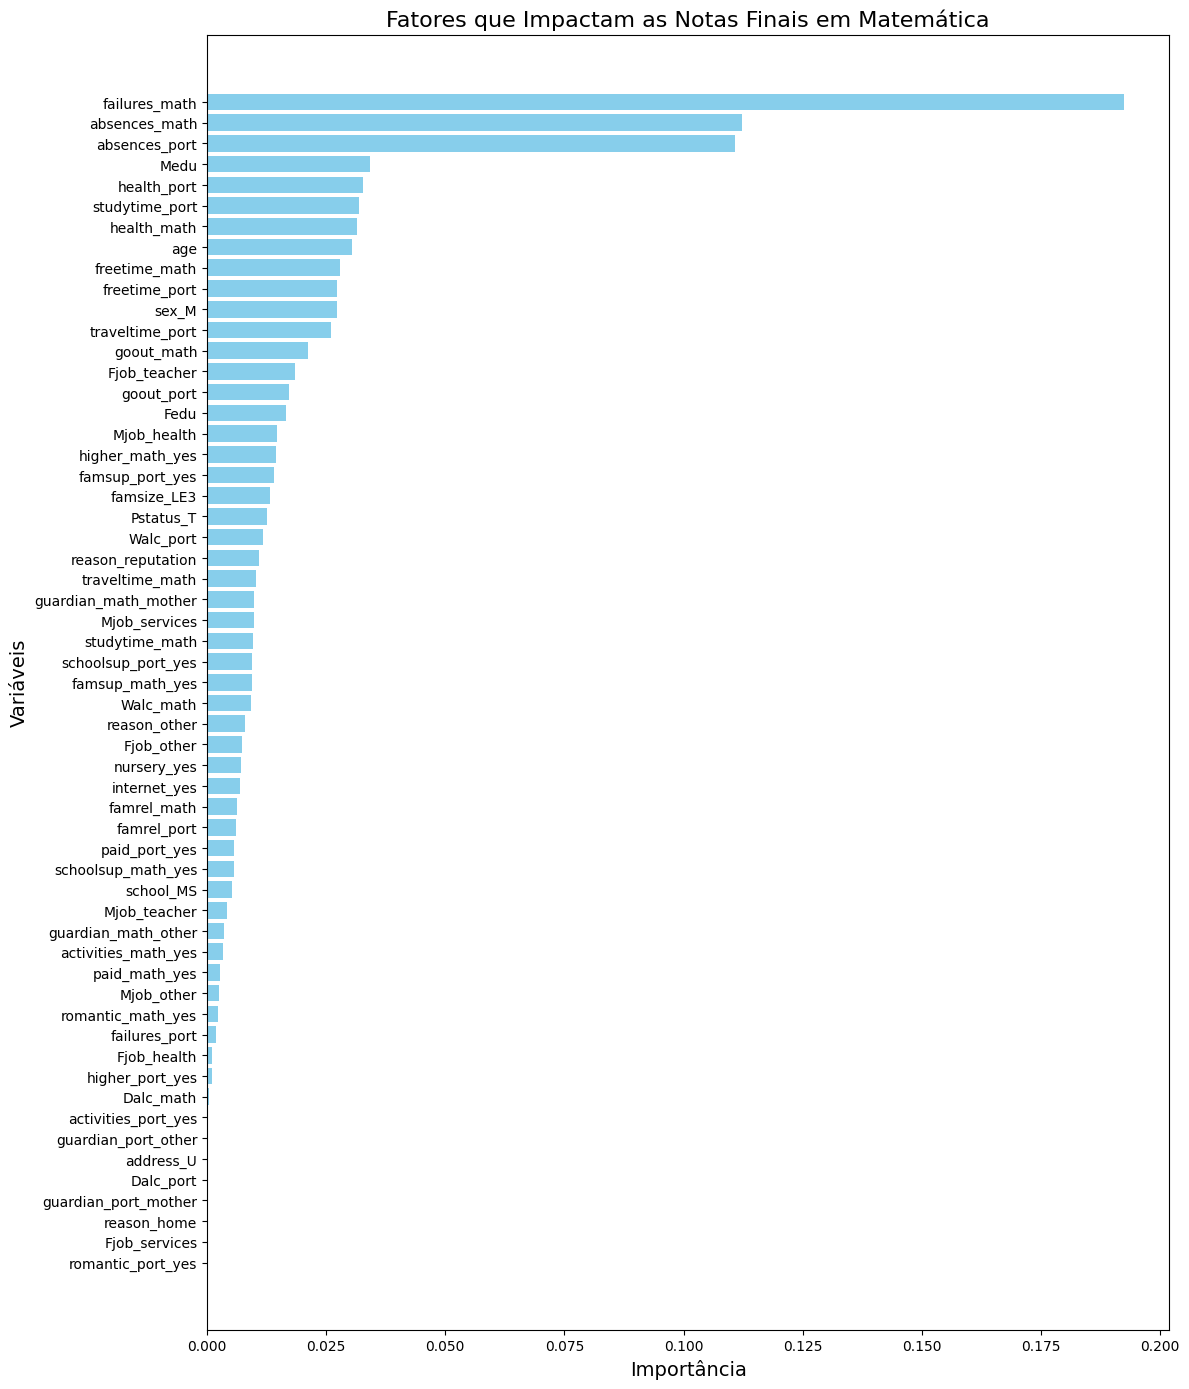

In [52]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 14))
plt.barh(importance_nm['Feature'], importance_nm['Importance'], color='skyblue')
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Variáveis', fontsize=14)
plt.title('Fatores que Impactam as Notas Finais em Matemática', fontsize=16)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Fatores que influenciam a Aprovação em **Matemática**

In [31]:
# Features e alvo
Xm = data.drop(columns=['class_math', 'aprovado_math'], errors='ignore')
ym = data['aprovado_math']

# Dividir os dados em treino e teste
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.3, random_state=42)


In [53]:
# @title
from dataclasses import dataclass
# Lista de colunas a serem removidas para regressão
columns_to_excludem = ['G1_port', 'G2_port', 'G3_port', 'G1_math', 'G2_math', 'G3_math', 'media_port','media_math', 'media_geral','class_geral', 'class_port', 'aprovado_port', 'aprovado_geral']

# Criar subconjunto de features para regressão
Xm_train_encoded = Xm_train.drop(columns=columns_to_excludem, errors='ignore')
Xm_test_encoded = Xm_test.drop(columns=columns_to_excludem, errors='ignore')

# Converter colunas categóricas em variáveis numéricas
Xm_train_regression = pd.get_dummies(Xm_train_encoded, drop_first=True)
Xm_test_regression = pd.get_dummies(Xm_test_encoded, drop_first=True)

# Garantir que as colunas de treino e teste sejam compatíveis
Xm_test_regression = Xm_test_regression.reindex(columns=Xm_train_regression.columns, fill_value=0)

# Treinar o modelo
rf_modelm = RandomForestClassifier(random_state=42)
rf_modelm.fit(Xm_train_regression, y_train)

# Importância das features
feature_importancesm = rf_modelm.feature_importances_
featuresm = Xm_train_regression.columns
importance_math_df = pd.DataFrame({'Feature': featuresm, 'Importance': feature_importancesm}).sort_values(by='Importance', ascending=False)

# Fatores mais importantes
print("Fatores que Impactam a Aprovação em Matemática:")
print(importance_math_df)

Fatores que Impactam a Aprovação em Matemática:
                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U   

#### Tabela Completa

In [54]:
print(importance_math_df.to_string())

                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U    0.017328
6            famrel_math    0.016886
1

#### Gráfico

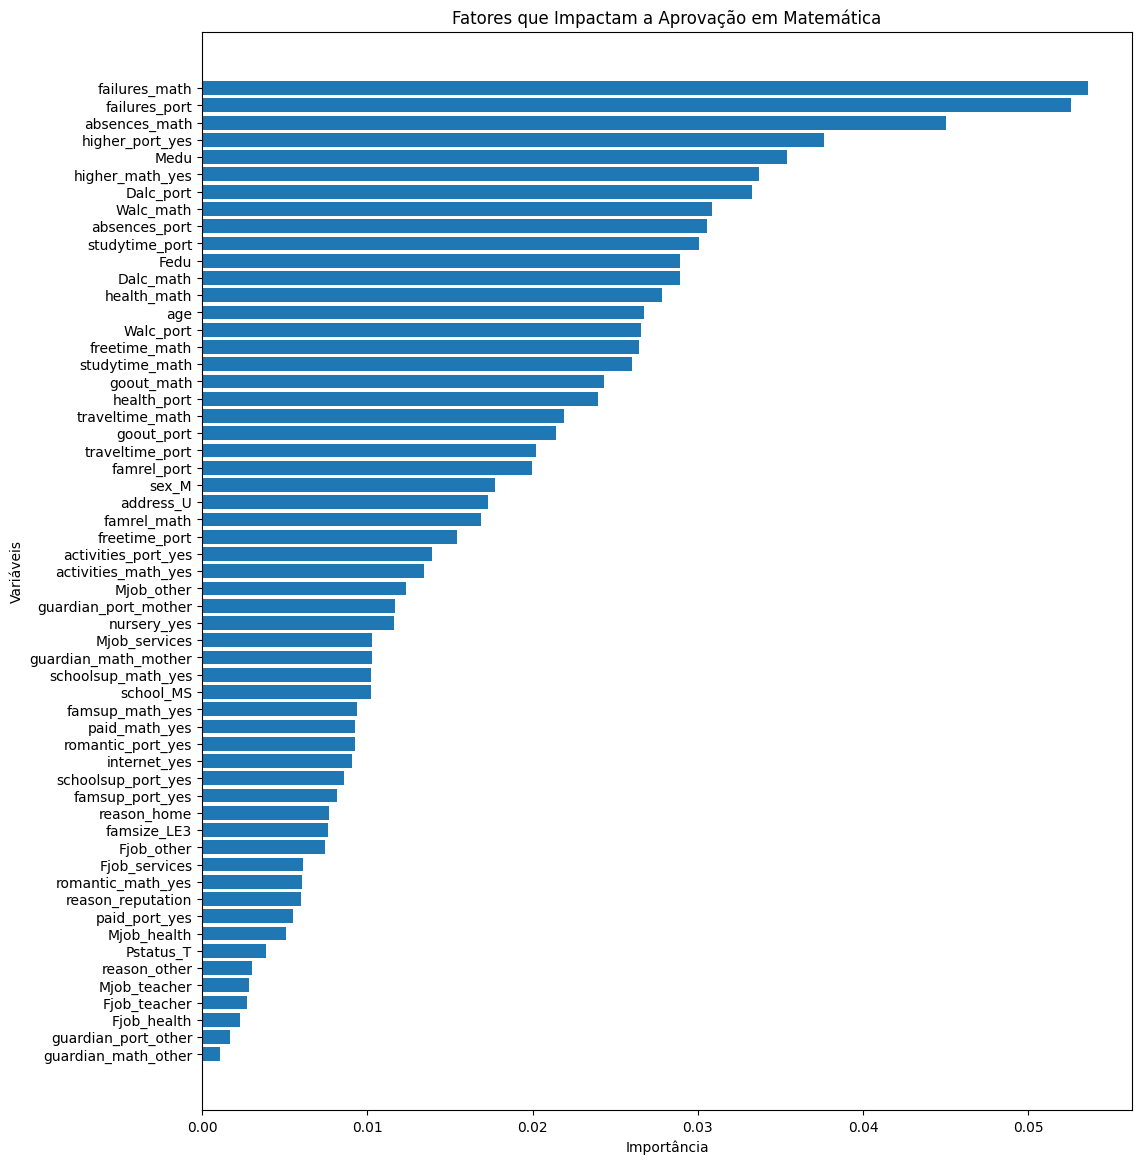

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,14))
plt.barh(importance_math_df['Feature'], importance_math_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Aprovação em Matemática')
plt.gca().invert_yaxis()

plt.show()

### Fatores que influenciam a Reprovação em **Matemática**

In [56]:
# Importância
importance_rm_df = pd.DataFrame({
    'Feature': Xm_train_regression.columns,
    'Importance': rf_modelm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibir fatores para reprovação
print("Fatores que Impactam a Reprovação:")
print(importance_rm_df)

Fatores que Impactam a Reprovação:
                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U    0.017328
6  

#### Tabela Completa

In [57]:
print(importance_rm_df.to_string())

                 Feature  Importance
5          failures_math    0.053601
15         failures_port    0.052587
12         absences_math    0.045010
55       higher_port_yes    0.037626
1                   Medu    0.035414
46       higher_math_yes    0.033729
19             Dalc_port    0.033300
10             Walc_math    0.030844
22         absences_port    0.030542
14        studytime_port    0.030070
2                   Fedu    0.028914
9              Dalc_math    0.028902
11           health_math    0.027827
0                    age    0.026731
20             Walc_port    0.026580
7          freetime_math    0.026455
4         studytime_math    0.026026
8             goout_math    0.024326
21           health_port    0.023939
3        traveltime_math    0.021909
18            goout_port    0.021441
13       traveltime_port    0.020214
16           famrel_port    0.019974
24                 sex_M    0.017758
25             address_U    0.017328
6            famrel_math    0.016886
1

#### Gráfico

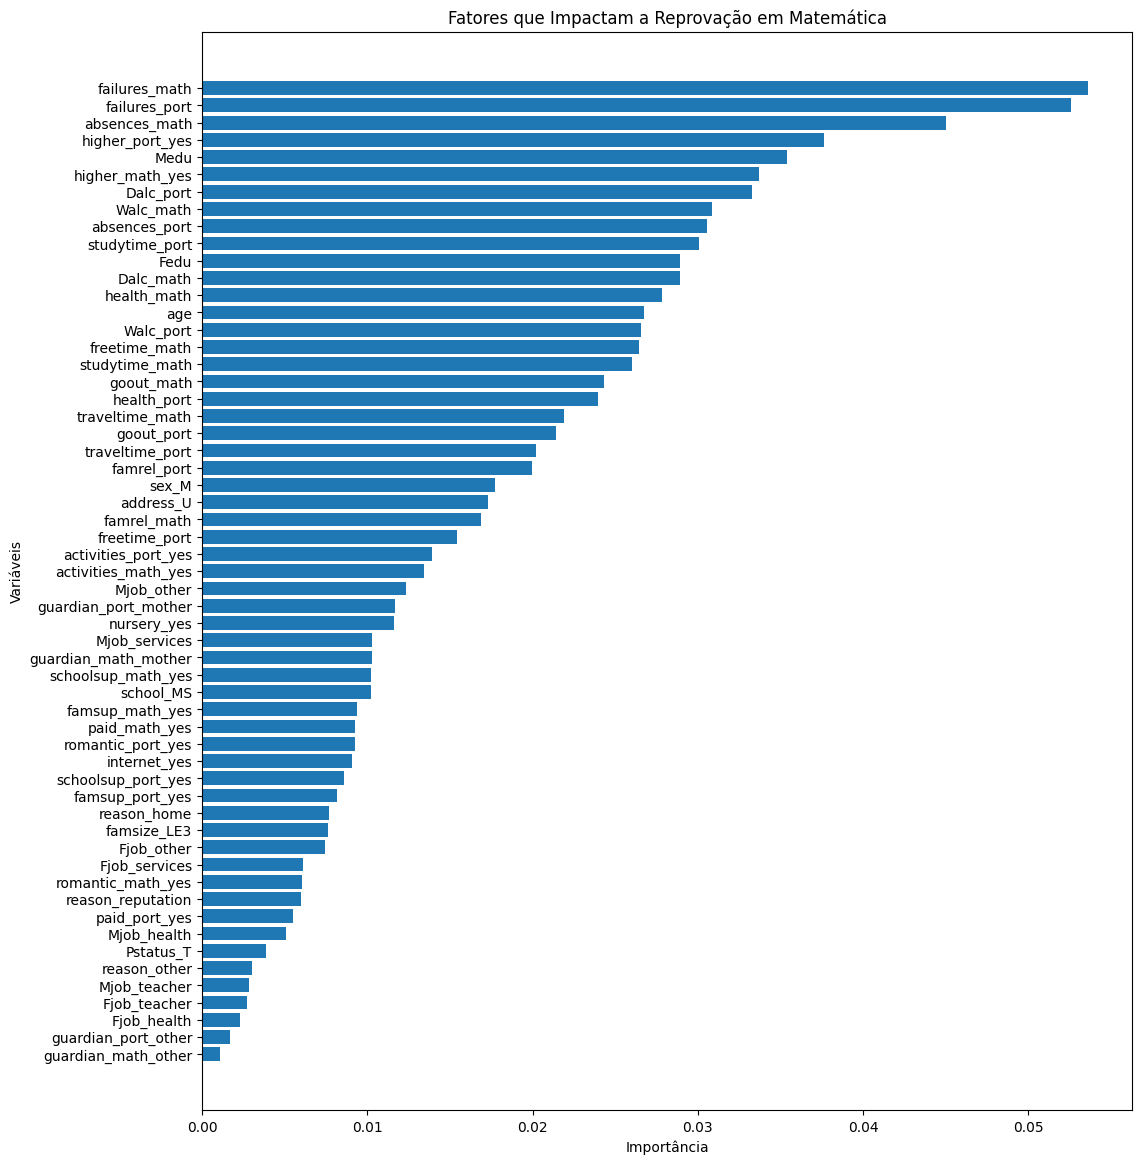

In [58]:
# Plot
plt.figure(figsize=(12,14))
plt.barh(importance_rm_df['Feature'], importance_rm_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Fatores que Impactam a Reprovação em Matemática')
plt.gca().invert_yaxis()

plt.show()

### **Primeiras Análises**

# **Resultados**

# **Conclusão**